In [1]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from collections import Counter
%matplotlib inline

# External functions to read the database
import inputs

In [34]:
LIGHTCURVES_PATH = '../data/lightcurves/'

In [35]:
# Loads the labels
df_labels = inputs.load_transient_labels(indir=LIGHTCURVES_PATH)

# Loads the lightcurves without labels associated to them
df_transient_nolabel = pd.read_csv(os.path.join(LIGHTCURVES_PATH, 'transient_lightcurves.csv'))
df_transient_nolabel = df_transient_nolabel.set_index(['ID', 'observation_id'])

# Joints the two tables to finally have lightcurves with labels associated to them
df_transient = df_labels.join(df_transient_nolabel, how='inner')

In [36]:
# This is how this new table looks
df_transient

class      Mag    Magerr  \
ID                        observation_id                             
TranID1409030010044114444 0                 SN?  18.8765  0.166417   
                          1                 SN?  20.0519  0.281733   
                          2                 SN?  20.2199  0.295764   
                          3                 SN?  21.1192  0.495390   
                          4                 SN?  19.3289  0.195002   
                          5                 SN?  20.5594  0.366624   
                          6                 SN?  20.3022  0.318527   
                          7                 SN?  21.0141  0.488018   
                          8                 SN?  19.8363  0.252095   
                          9                 SN?  20.9989  0.487018   
                          10                SN?  19.8069  0.253085   
                          11                SN?  20.5166  0.369392   
                          12                SN?  19.5845  0.243183   
TranID1209210010044118805 13              Flare  20.2378  0.316525   
                          14              Flare  20.2106  0.339888   
                          15              Flare  19.8779  0.266032   
                          16              Flare  20.4570  0.392199   
                          17              Flare  20.5868  0.389254   
                          18              Flare  20.0997  0.299589   
                          19              Flare  19.7508  0.250783   
                          20              Flare  19.8172  0.238706   
                          21              Flare  20.3172  0.312336   
                          22              Flare  20.1174  0.291744   
                          23              Flare  20.1865  0.291934   
                          24              Flare  20.1990  0.292459   
                          25              Flare  20.6224  0.371839   
                          26              Flare  20.1141  0.281476   
                          27              Flare  21.0763  0.495599   
                          28              Flare  20.3892  0.335829   
                          29              Flare  20.9899  0.462466   
...                                         ...      ...       ...   
TranID1101151181224113126 451444             CV  19.9598  0.260803   
                          451445             CV  18.5121  0.133876   
                          451446             CV  17.8373  0.096209   
                          451447             CV  17.9806  0.152134   
                          451448             CV  20.2531  0.330741   
                          451449             CV  19.7503  0.234348   
                          451450             CV  18.6828  0.200193   
                          451451             CV  17.8431  0.161372   
                          451452             CV  21.0005  0.511079   
                          451453             CV  18.6293  0.149208   
TranID1109230181234122987 451454          Comet  14.5184  0.319080   
                          451455          Comet  18.4514  0.133913   
                          451456          Comet  20.2346  0.316886   
                          451457          Comet  18.7588  0.152163   
TranID1209190181234125108 451458             SN  18.9697  0.177301   
                          451459             SN  18.4425  0.139430   
                          451460             SN  17.9654  0.115327   
                          451461             SN  18.2199  0.125298   
                          451462             SN  18.4801  0.143727   
                          451463             SN  18.4686  0.139275   
                          451464             SN  18.3891  0.132249   
                          451465             SN  18.3154  0.129101   
                          451466             SN  18.4984  0.145238   
                          451467             SN  18.3300  0.132599   
                          451468             SN  18.

In [37]:
# Count how many unique transient IDs we have.
ids = df_transient.index.get_level_values('ID').unique()
print('Number of unique transients:', len(ids))

Number of unique transients: 4869


In [38]:
# Loads the nontransient lightcurves and count how many do we have
df_nontransient = pd.read_csv(os.path.join(LIGHTCURVES_PATH, 'nontransient_lightcurves.csv'))
df_nontransient = df_nontransient.set_index(['ID'])
print('Number of unique nontransients:', len(df_nontransient.index.get_level_values('ID').unique()))

Number of unique nontransients: 16940


In [39]:
# Counts how many lightcurves per class do we have.
# Print them in reverse order
count = Counter(list((df_labels['class'])))
class_names = list(count.keys())
class_count = list(count.values())
ii = np.argsort(class_count)[::-1] # reverse order
for i in ii[::-1]:
    print("{} & {} \\\\".format(class_names[i], class_count[i]))

CV/Blazar & 1 \\
Var/Flare? & 1 \\
Ast/Flare & 1 \\
UvES & 1 \\
AGB & 1 \\
Var/Artifact & 1 \\
AGN/Var? & 1 \\
Ast/Var & 1 \\
CV/Ast? & 1 \\
Var/AGN & 1 \\
AMCVn? & 1 \\
Flare/CV & 1 \\
CV/Var? & 1 \\
Nova/CV & 1 \\
Blazar/SN & 1 \\
Ast/SN? & 1 \\
RRLyrae & 1 \\
FU & 1 \\
Comet/Ast? & 1 \\
O/Ne & 1 \\
HPM/Var? & 1 \\
SN/Var? & 1 \\
Ast/Var?? & 1 \\
SN/TDE? & 1 \\
Var/Nothing & 1 \\
SN/nothing? & 1 \\
Red & 1 \\
Very & 1 \\
Var/nothing? & 1 \\
Lensing/nothing? & 1 \\
OH-IR & 1 \\
AGN/nothing? & 1 \\
CV/SN? & 1 \\
Ast/Flare? & 1 \\
Maser & 1 \\
CV/Var/Ast & 1 \\
Nothing/Lensing & 1 \\
AGN/Flare? & 1 \\
OH_IR & 1 \\
Flare/SN? & 1 \\
Var/Nova & 1 \\
Nova? & 1 \\
LHS_5157 & 1 \\
RCorB & 1 \\
Merger/CV? & 1 \\
Unclear & 1 \\
HPM_GJ3329 & 1 \\
GRB & 1 \\
Carb & 2 \\
Var/Ast? & 2 \\
CV/Flare & 2 \\
QSO & 2 \\
Flare/SN & 2 \\
SN/Ast? & 2 \\
Carbon & 2 \\
Var/SN & 2 \\
SDSS & 2 \\
Ast/CV? & 2 \\
Variable & 2 \\
Ast/Var? & 2 \\
AGN/CV & 2 \\
RRL & 2 \\
Var/SN? & 2 \\
TDE? & 3 \\
CV/AGN? & 3 \\
HP

In [40]:
# Count:
# - number of points in every light-curve 
# - average magnitude per light curve
# - magnitude standard deviation per light curve 
n_points = len(set(df_transient.index.get_level_values('ID')))
len_curve = np.zeros(n_points)
classes = np.empty(n_points, dtype=object)
average_mag = np.zeros(n_points)
std_dev_mag = np.zeros(n_points)
chi_squared_trans = np.zeros(n_points)
for i in range(n_points):
    df_item = df_transient[df_transient.index.get_level_values('ID').isin(ids[i:i+1])]
    len_curve[i] = len(df_item)
    classes[i] = df_item['class'][0]
    average_mag[i] = np.average(df_item['Mag'])
    std_dev_mag[i] = np.std(df_item['Mag'])
    chi_squared_trans[i] = np.sum((df_item['Mag']-average_mag[i])**2/(df_item['Magerr']**2))/len_curve[i]

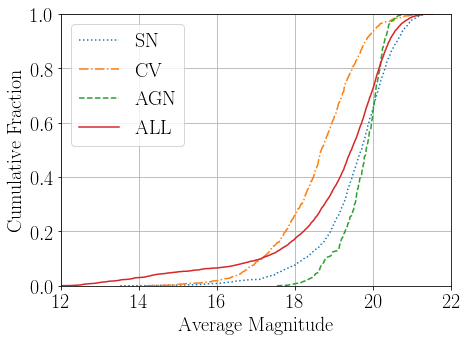

In [41]:
fig = plt.figure(figsize=(7,5))
plt.rc('text', usetex=True,)
plt.rc('font', family='serif', size=20)
classes = np.array(classes)

for c,z in zip(['SN', 'CV', 'AGN'],[':', '-.', '--']):
    ii = (classes == c)
    tmp_len = average_mag[ii]
    tmp_len.sort()
    n_points = len(tmp_len)
    plt.plot(tmp_len, np.linspace(0,1,n_points), label=c, linestyle=z)
    
n_points = len(average_mag)
sorted_len = average_mag.copy()
sorted_len.sort()
plt.plot(sorted_len, np.linspace(0,1,n_points), label='ALL')
plt.ylim([0,1])
plt.xlim([12,22])
plt.xlabel('Average Magnitude')
plt.ylabel('Cumulative Fraction')
plt.grid()
plt.legend()
plt.savefig('cumulative_magnitude.pdf', bbox_inches='tight')

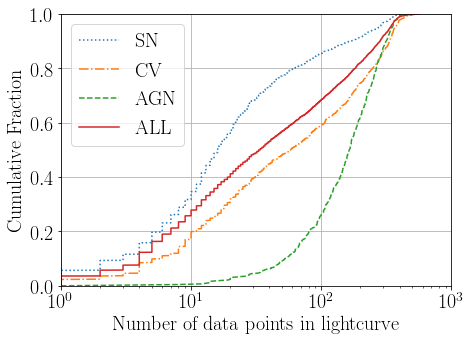

In [42]:
fig = plt.figure(figsize=(7,5))
plt.rc('text', usetex=True,)
plt.rc('font', family='serif', size=20)
classes = np.array(classes)
len_curve = np.array(len_curve)

for c,z in zip(['SN', 'CV', 'AGN'],[':', '-.', '--']):
    ii = (classes == c)
    tmp_len = len_curve[ii]
    tmp_len.sort()
    n_points = len(tmp_len)
    plt.plot(tmp_len, np.linspace(0,1,n_points), label=c, linestyle=z)
    
n_points = len(len_curve)
sorted_len = len_curve.copy()
sorted_len.sort()
plt.plot(sorted_len, np.linspace(0,1,n_points), label='ALL')
_ = plt.semilogx()
plt.ylim([0,1])
plt.xlim([1,1000])
plt.xlabel('Number of data points in lightcurve')
plt.ylabel('Cumulative Fraction')
plt.grid()
plt.legend()
plt.savefig('cumulative_classes.pdf', bbox_inches='tight')

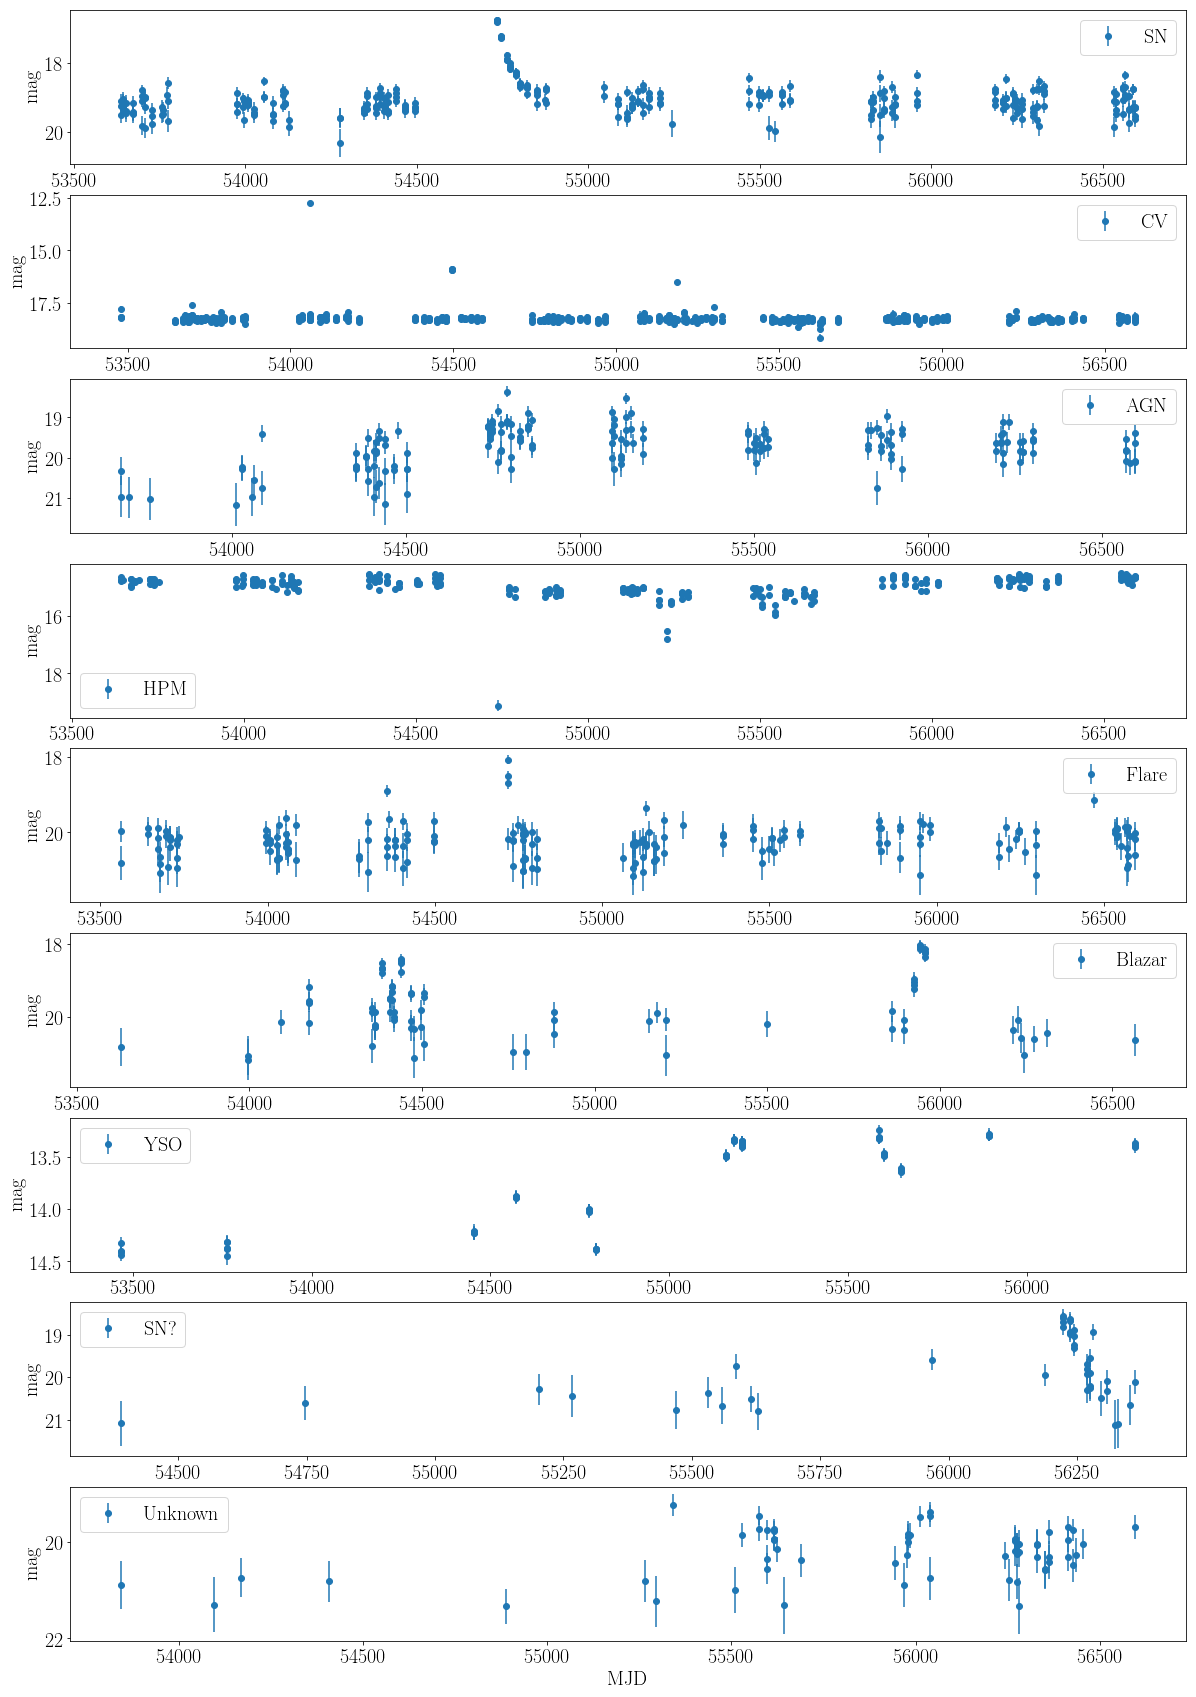

In [43]:
fig = plt.figure(figsize=(20,30))
plt.rc('text', usetex=True,)
plt.rc('font', family='serif', size=20)
items = [121,  624, 400, 2900, 133, 501, 602, 456, 941]

for i in range(len(items)):
    id_item = items[i]
    fig.add_subplot(len(items),1,i+1)
    df_item = df_transient[df_transient.index.get_level_values('ID').isin(ids[id_item:id_item+1])]
    plt.errorbar(df_item['MJD'], df_item['Mag'], yerr=df_item['Magerr'],fmt='o',label=df_item['class'][0])
    plt.gca().invert_yaxis()
    plt.legend()
    plt.ylabel('mag')
    
plt.xlabel('MJD')
plt.savefig('examples_transient.pdf', bbox_inches='tight')


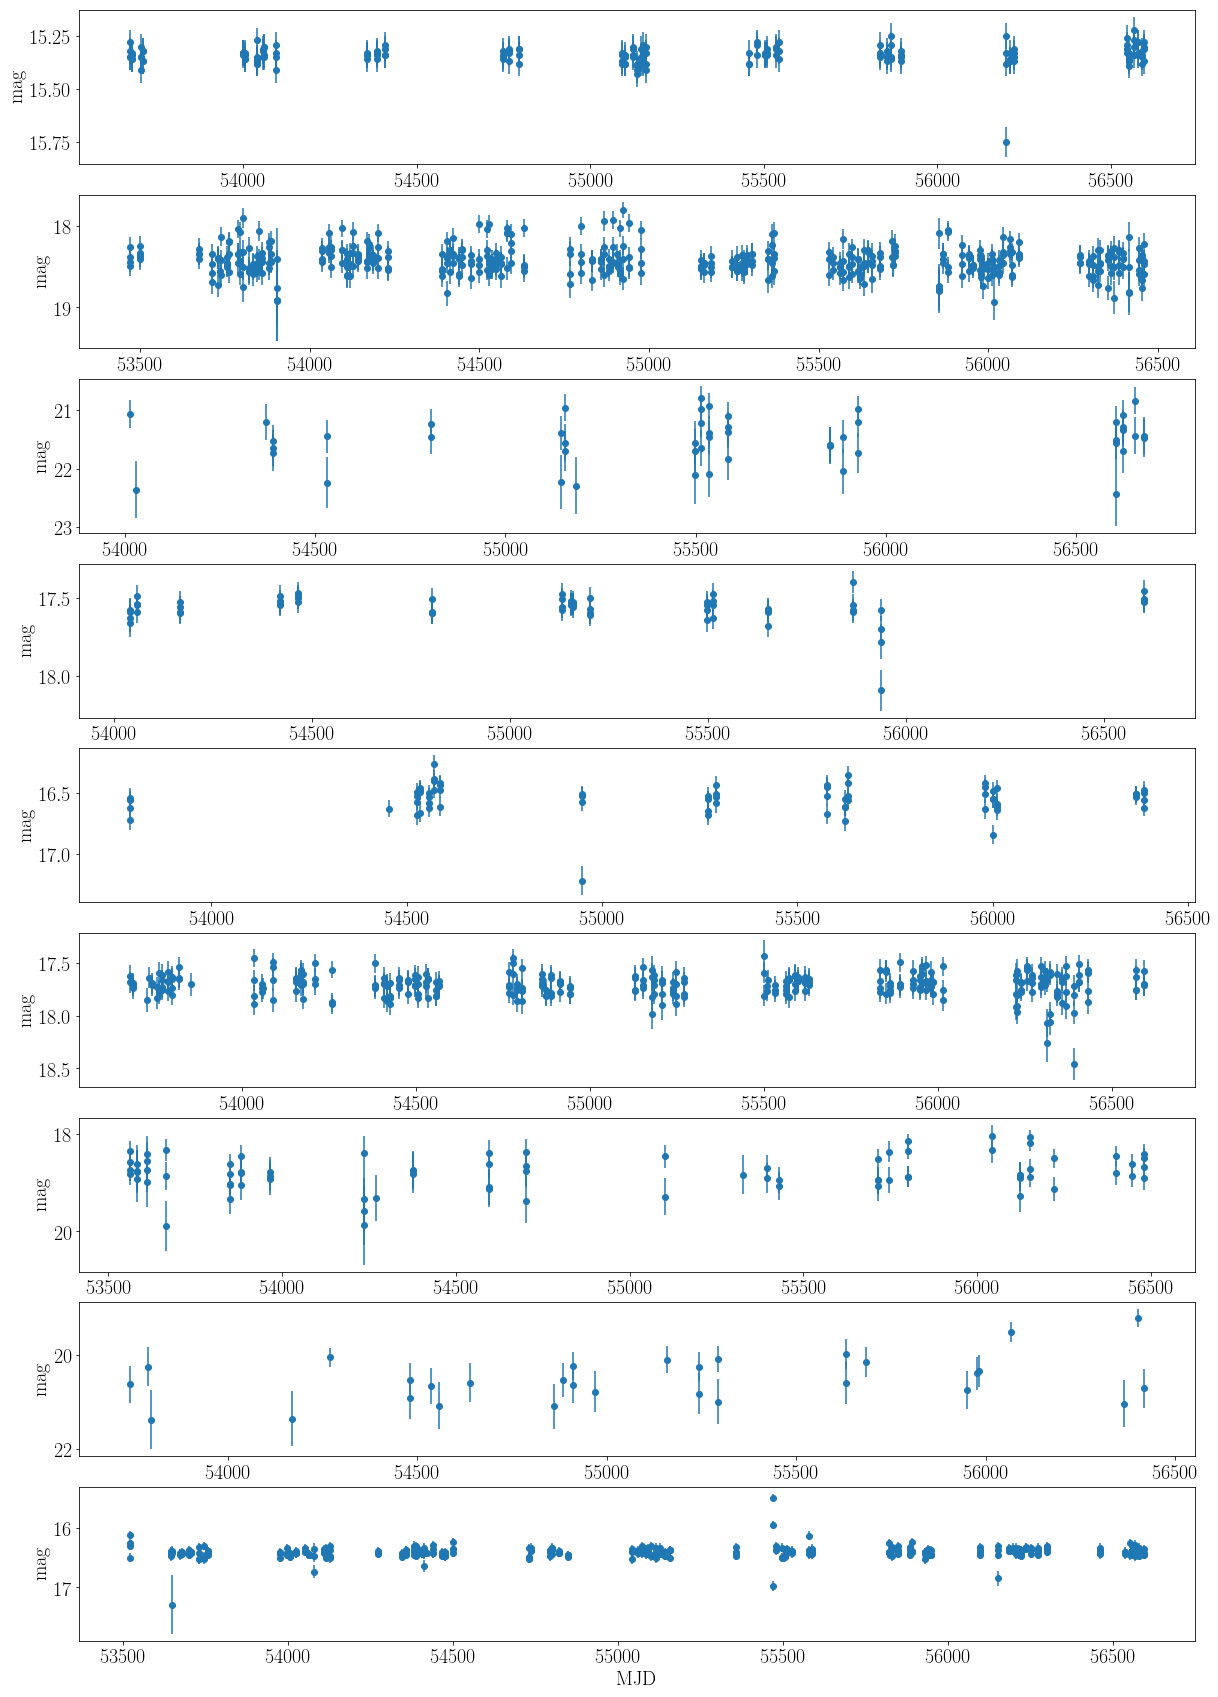

In [44]:
fig = plt.figure(figsize=(20,30))
plt.rc('text', usetex=True,)
plt.rc('font', family='serif', size=20)
items = [1210,  8624, 9400, 2900, 133, 501, 602, 456, 941]

ids = df_nontransient.index.get_level_values('ID').unique()

for i in range(len(items)):
    id_item = items[i]
    fig.add_subplot(len(items),1,i+1)
    df_item = df_nontransient[df_nontransient.index.get_level_values('ID').isin(ids[id_item:id_item+1])]
    plt.errorbar(df_item['MJD'], df_item['Mag'], yerr=df_item['Magerr'],fmt='o')
    plt.gca().invert_yaxis()
    plt.ylabel('mag')
    
plt.xlabel('MJD')
plt.savefig('examples_nontransient.pdf', bbox_inches='tight')

In [45]:
df_item = df_nontransient[df_nontransient.index.get_level_values('ID').isin(ids[id_item:id_item+1])]

In [46]:
df_nontransient.index.get_level_values('ID').isin(ids[id_item:id_item+1])

array([False, False, False, ..., False, False, False])

In [15]:
# Explore chi-squared of non-transients

In [49]:
# Count:
# - number of points in every non-transiente light-curve 
# - average magnitude per light curve
# - chi-squared for every non-transient light-curve
n_points = len(set(df_nontransient.index.get_level_values('ID')))
len_curve = np.zeros(n_points)
average_mag = np.zeros(n_points)
std_dev_mag = np.zeros(n_points)
chi_squared_nontrans = np.zeros(n_points)
for i in range(n_points):
    df_item = df_nontransient[df_nontransient.index.get_level_values('ID').isin(ids[i:i+1])]
    len_curve[i] = len(df_item)
    average_mag[i] = np.average(df_item['Mag'])
    std_dev_mag[i] = np.std(df_item['Mag'])
    chi_squared_nontrans[i] = np.sum((df_item['Mag']-average_mag[i])**2/(df_item['Magerr']**2))/len_curve[i]

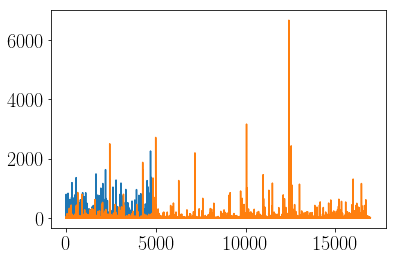

In [56]:
plt.plot(chi_squared_trans)
plt.plot(chi_squared_nontrans)

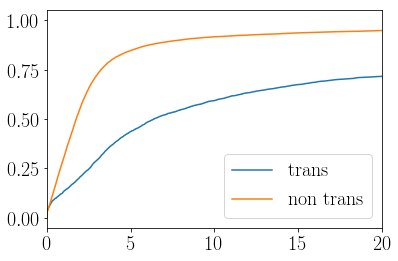

In [63]:
plt.plot(np.sort(chi_squared_trans), np.linspace(0.0, 1.0, len(chi_squared_trans)), label='trans')
plt.plot(np.sort(chi_squared_nontrans), np.linspace(0.0, 1.0, len(chi_squared_nontrans)), label='non trans')
plt.xlim([0,20])
plt.legend()

In [68]:
np.count_nonzero(chi_squared_trans<1.0)/len(chi_squared_trans)

0.13452454302731567

In [66]:
np.count_nonzero(chi_squared_nontrans<1.0)

5159

In [67]:
np.count_nonzero(chi_squared_nontrans<1.0)/len(chi_squared_nontrans)

0.30454545454545456